# INTEGRALS FOR THE FLARE ENERGY CALCULATION

Testing/demoing some functions used in the calculations of flare energies. First, TESS response function.

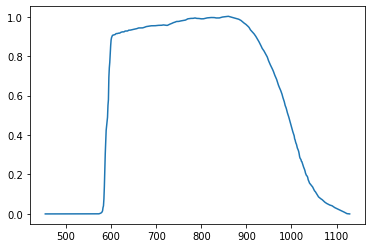

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d
from scipy.integrate import quad, trapz, simps

K_B = 1.3806485e-23
C_PLANCK = 6.62607004e-34
C_C = 2.99792458e8
SIGMA_SB = 5.670374419e-8
LAMBDA_MIN = 454.06
LAMBDA_MAX = 1129.15
NANOMETER = 1.0e-9

def Response_TESS():
    
    '''
    Returns the TESS response curve as a function of the wavelength
    lambd. It's a spline interpolation 
    of the TESS response function.
    '''
    
    responsefile = "tess-response-function-v1.0.csv"
    rs = np.genfromtxt(responsefile, delimiter=',')
    f = interp1d(rs[:,0], rs[:,1])
    return f

r = np.arange(LAMBDA_MIN,LAMBDA_MAX)
f = Response_TESS()
plt.plot(r,f(r))

Looks correct, Planck distribution:

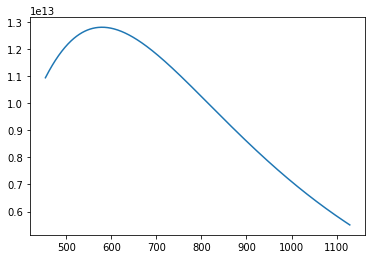

In [3]:
def B(lambd, T):
    
    '''
    The Planck distribution as a function of wavelength (in nanometers)
    '''
    
    l = lambd*NANOMETER
    denom = np.exp(C_PLANCK*C_C/(l*K_B*T)) - 1.
    num = 2. * C_PLANCK * C_C**2. * l**(-5.)
    return num/denom

T = 5000.0
plt.plot(r, B(r,T))

And the luminosity inside the TESS response

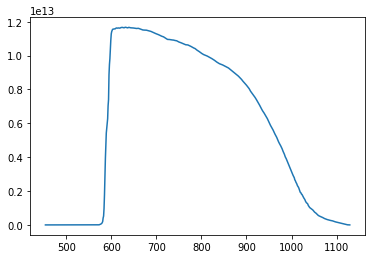

In [4]:
def L(lambd):
    return B(lambd, T)*f(lambd)

plt.plot(r, L(r))

Then see if our integrals make sense:

In [5]:
integ1,err = quad(L, LAMBDA_MIN, LAMBDA_MAX)
integ2 = trapz(L(r),r)
integ3 = simps(L(r),r)
print("Quad: {:.1f} plus minus {:.1f}".format(integ1*NANOMETER,err*NANOMETER))
print("Trapezoidal: {:.1f}".format(integ2*NANOMETER))
print("Simpson: {:.1f}".format(integ3*NANOMETER))

Quad: 3979050.7 plus minus 2242.2
Trapezoidal: 3979773.4
Simpson: 3979773.5


/home/tedkorho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  """Entry point for launching an IPython kernel.


Aight, Simpson it is since the quadrature seems too flakey. But these functions seem fine.